<a href="https://colab.research.google.com/github/dgonzalezt2/IMDBAnalytics/blob/main/IMDBAnalyticsColab/IMDBAnalyticsColab_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller

Responder las preguntas de analítica acerca de la base de datos de IMDB que se encuentran a lo largo de este documento. Modifique el nombre de este archivo por el número de su documento (123456789.ipynb) y adjúntelo como parte de los entregables del taller.

Nombre: 



### Descargar los datos:
- Tabla de películas
- Archivo .shp y archivos auxiliares con la información necesaria para pintar el mapa

Estos archivos quedarán en la carpeta _/content/IMDBAnalyticsData/_ asociada con el sistema operativo del servidor en el que se está ejecutando google colab. 

In [6]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr' -O data
!unzip "/content/data" -d "/content/IMDBAnalyticsData/"


--2023-03-02 18:53:29--  https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr
Resolving docs.google.com (docs.google.com)... 172.253.115.100, 172.253.115.138, 172.253.115.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.115.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gnsjsfhe7snhjd55u2jvvmhbdd9oc3qc/1677783150000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=5f1526ee-972a-4d6a-920b-ac2bd10953d4 [following]
--2023-03-02 18:53:30--  https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gnsjsfhe7snhjd55u2jvvmhbdd9oc3qc/1677783150000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=5f1526ee-972a-4d6a-920b-ac2bd10953d4
Resolving doc-14-6c-docs.googleusercontent.com (doc-14-6c-docs.googleusercontent.com)... 172.253.62.132, 2607:f


### Importar las librerías necesarias

La libreia geopandas, que sirve para el procesamiento de archivos con información geográfica (shapefiles) no está instalada por defecto en el ambiente de google colab. Por esta razón, debe instalarla

In [7]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.2 MB/s eta 0:00:00


In [8]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

### Información básica de la tabla de películas

In [10]:
df = pd.read_csv('IMDBAnalyticsData/Data/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**Pregunta 1**

Utilice histogramas para comparar la distribución de la columna _imdb_score_ relacionada con películas producidas en Francia y Canadá.

Para crear el histograma:

- Ajuste el número de _bins_ a 20
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

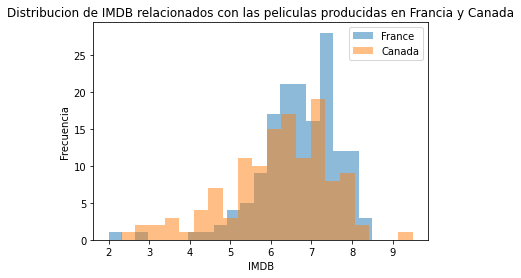

In [11]:
#Espacio para el código de la pregunta 1
import pandas as pd
import matplotlib.pyplot as plt

# Se carga los datos en un DataFrame:
df = pd.read_csv('IMDBAnalyticsData/Data/movie_metadata.csv')

# Se selecciona solo las filas correspondientes a películas producidas en Francia y Canadá
df_fr_can = df.loc[df['country'].isin(['France', 'Canada'])]

# Separa los datos por país:
df_france = df_fr_can.loc[df_fr_can['country'] == 'France']
df_canada = df_fr_can.loc[df_fr_can['country'] == 'Canada']

# Se ajusta los bins:
num_bins = 20

# Se crea los histogramas:
plt.hist(df_france['imdb_score'], bins=num_bins, alpha=0.5, label='France')
plt.hist(df_canada['imdb_score'], bins=num_bins, alpha=0.5, label='Canada')

# agregar etiquetas de los ejes y título
plt.xlabel('IMDB')
plt.ylabel('Frecuencia')
plt.title('Distribucion de IMDB relacionados con las peliculas producidas en Francia y Canada')

# Para remover el grid:
plt.grid(False)

# Para agregar la leyenda:
plt.legend()

# Para mostrar el histograma:
plt.show()

**Pregunta 2**

Cree un histograma para mirar la distribución de la columna _imdb_score_ de las películas producidas en blanco y negro.

Para crear el histograma:

- Ajuste el número de _bins_ a 10
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

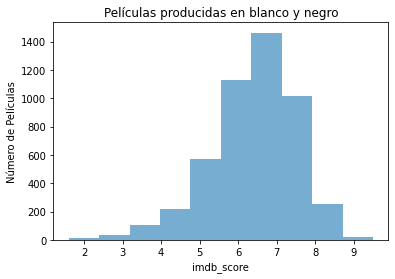

In [12]:
#Espacio para el código de la pregunta 2
df_NaN = df[df['color'] != ' Black and White']

plt.hist(df_NaN['imdb_score'], bins=10, alpha=0.6, label='Blanco y negro')

plt.xlabel('imdb_score')
plt.ylabel('Número de Películas')
plt.title('Películas producidas en blanco y negro')

plt.grid(False)

plt.show()

**Pregunta 3**

¿Qué país tiene el mayor promedio de calificación de películas? Utilice figuras de barras para visualizar los resultados.  



country
Afghanistan             7.400000
Argentina               7.500000
Aruba                   4.800000
Australia               6.514545
Bahamas                 4.400000
                          ...   
Turkey                  6.000000
UK                      6.818304
USA                     6.367428
United Arab Emirates    8.200000
West Germany            7.266667
Name: imdb_score, Length: 65, dtype: float64
El país con más promedio de películas producidas fue Kyrgyzstan con 8.7 Películas


Text(0, 0.5, 'mean of movies')

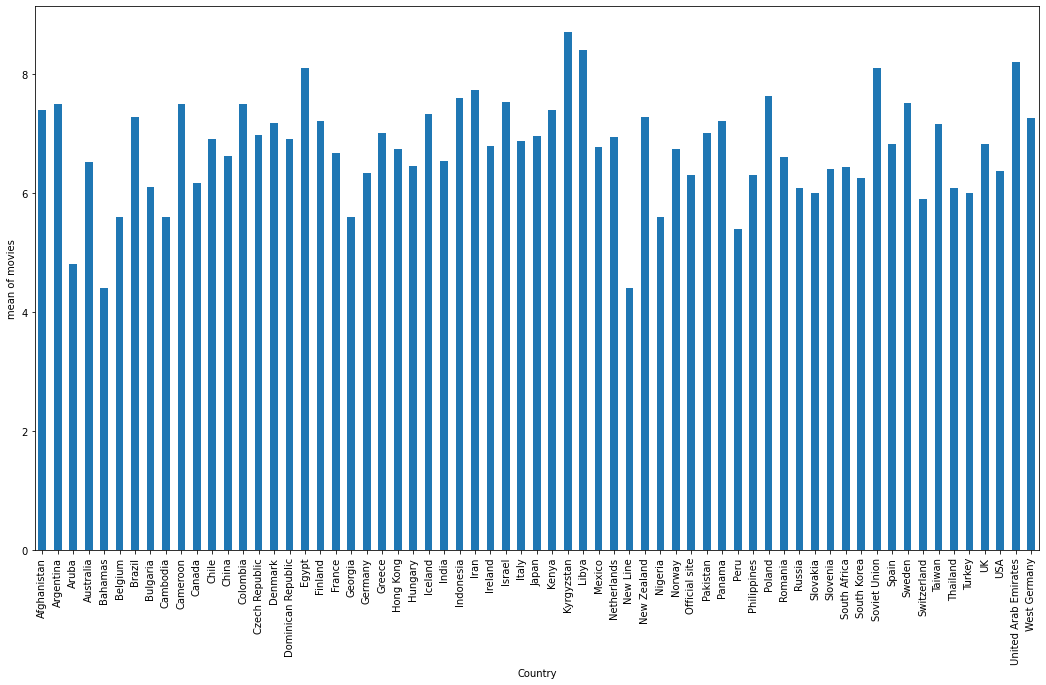

In [13]:
#Espacio para el código de la pregunta 3
count_per_year = df.groupby('country')['imdb_score'].mean()
print(count_per_year)
print(f"El país con más promedio de películas producidas fue {count_per_year.idxmax()} con {count_per_year.max()} Películas")

ax = count_per_year.plot.bar(figsize = (18,10))
ax.set_xlabel('Country')
ax.set_ylabel('mean of movies')

**Pregunta 4** 

¿Cuántas películas a blanco y negro y cuántas películas a color se tienen en la base de datos?


In [14]:
#Espacio para el código de la pregunta 4
black_and_white_movies = df[df['color'] == ' Black and White']
num_black_and_white_movies = len(black_and_white_movies)

print(f"Hay un total de {num_black_and_white_movies} Películas producidas en blanco y negro")

color = df[df['color'] == 'Color']
num_color = len(color)

print(f"Hay un total de {num_color} películas producidas a color")

Hay un total de 209 Películas producidas en blanco y negro
Hay un total de 4815 películas producidas a color


**Pregunta 5**

¿Cuál película de Christopher Nolan tiene la mayor calificación (_imdb_score_)? Utilice figuras de barras para visualizar los resultados.

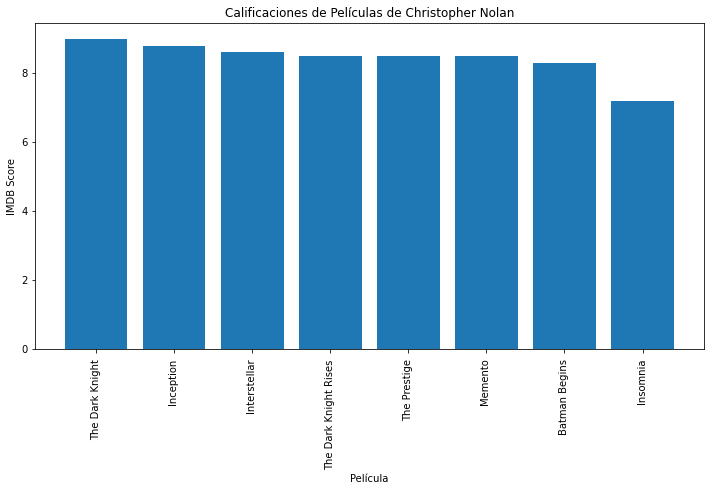

In [15]:
#Espacio para el código de la pregunta 5
# Filtrar las películas dirigidas por Christopher Nolan

# Seleccionar todas las películas de Christopher Nolan
nolan_movies = df[df['director_name'] == 'Christopher Nolan']

# Ordenar las películas por imdb_score de forma descendente
nolan_movies = nolan_movies.sort_values(by='imdb_score', ascending=False)

# Crear un gráfico de barras con los imdb_scores y los títulos de las películas
plt.bar(nolan_movies['movie_title'], nolan_movies['imdb_score'])

# Rotar las etiquetas del eje x para que se lean verticalmente
plt.xticks(rotation=90)

# Ajustar el tamaño de la figura para que los títulos de las películas no se superpongan
plt.gcf().set_size_inches(12, 6)

# Configurar el título y las etiquetas de los ejes
plt.title('Calificaciones de Películas de Christopher Nolan')
plt.xlabel('Película')
plt.ylabel('IMDB Score')

# Mostrar la figura
plt.show()

**Pregunta 6**

Utilice un _line chart_ para visualizar cuántas películas se produjeron en USA desde el 2010 hasta el 2015.

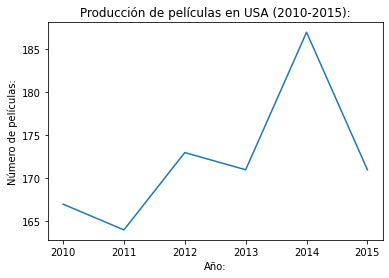

In [16]:
#Espacio para el código de la pregunta 6
usa_movies = df[(df['country'] == 'USA') & (df['title_year'] >= 2010) & (df['title_year'] <= 2015)]

# Contar el número de películas producidas por año:
movies_per_year = usa_movies['title_year'].value_counts().sort_index()

# Crear el line chart:
plt.plot(movies_per_year.index, movies_per_year.values)
plt.title('Producción de películas en USA (2010-2015):')
plt.xlabel('Año:')
plt.ylabel('Número de películas:')
plt.show()

**Pregunta 7**

Grafique en un mapa el _imdb_score_ promedio de las películas producidas en cada país.

In [ ]:
#Espacio para el código de la pregunta 7


**Pregunta 8**

¿Qué información de su proyecto podría utilizar para hacer analítica de datos?


In [ ]:
En nuestro proyecto se podria utilizar la analitica de datos para conocer a los usuarios de sus preferencias y gustos de los juegos
para tener un mejor uso del matchmaking y asi tener un buen uso de la aplicacion. ,